In [1]:
#Tarvittavien kirjastojen tuominen.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
#Nasdaqin aineistojen tuominen ja järjestäminen vanhimmasta uusimpaan.
kesko = pd.read_csv("NASDAQ_KESKO.csv", sep = ';', decimal = ',', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
kesko.head()
stockmann = pd.read_csv("NASDAQ_STOCKMANN.csv", sep = ';', decimal = ',', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
stockmann.head()
kesko.index = pd.to_datetime(kesko['Date'],dayfirst=True)
stockmann.index = pd.to_datetime(stockmann['Date'],dayfirst=True)
kesko.sort_index(inplace = True)
stockmann.sort_index(inplace = True)

In [3]:
stockmann.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2009-01-02,2.1.2009,10.851,11.087,10.792,11.097,10.792,11.097,10.820,1333.002035,14423.51,17
2009-01-05,5.1.2009,11.440,11.480,11.097,11.588,11.097,11.480,11.366,3052.971810,34699.95,25
2009-01-07,7.1.2009,10.861,11.391,11.578,11.764,10.851,10.851,11.617,6141.585386,71348.52,44
2009-01-08,8.1.2009,10.900,11.097,11.686,11.686,11.097,11.097,11.246,1174.141594,13203.80,10
2009-01-09,9.1.2009,11.293,11.538,10.959,11.548,10.959,11.362,11.173,2619.160606,29263.28,13


In [4]:
kesko.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2009-01-02,2.1.2009,21.80,21.99,22.00,22.00,21.81,21.98,21.876,950.0,20782.06,17
2009-01-05,5.1.2009,21.87,22.10,22.20,22.40,21.70,22.10,22.068,2455.0,54175.77,17
2009-01-07,7.1.2009,21.70,22.15,21.99,22.15,21.85,22.15,22.020,1655.0,36443.30,12
2009-01-08,8.1.2009,21.71,22.20,21.71,23.00,21.71,22.00,22.166,3591.0,79597.16,20
2009-01-09,9.1.2009,21.73,22.40,22.00,22.40,22.00,22.40,22.186,1033.0,22918.20,5


Text(0.5, 1.0, 'KESKON KURSSIKEHITYS')

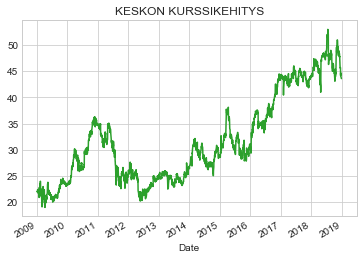

In [5]:
#Keskon kurssikehitys 2009-2019.
color = "C2"
kesko['Closing price'].plot(color=color)
plt.title("KESKON KURSSIKEHITYS")

Text(0.5, 1.0, 'STOCKMANNIN KURSSIKEHITYS')

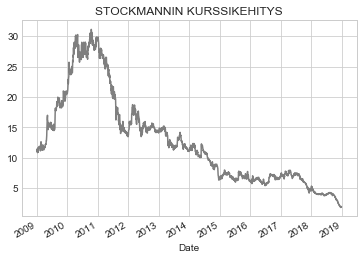

In [6]:
#Stockmannin kurssikehitys 2009-2019.
color = "C7"
stockmann["Closing price"].plot(color=color)
plt.title("STOCKMANNIN KURSSIKEHITYS")

Text(0.5, 1.0, 'KESKON KURSSIKEHITYS 2018')

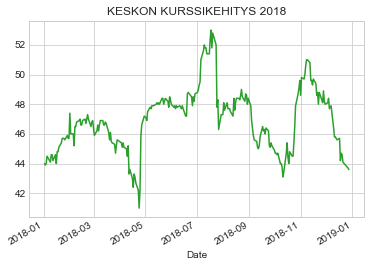

In [7]:
#Keskon kurssikehitys vuonna 2018, tammikuu - joulukuu.
color = "C2"
kesko["Closing price"]["2018-01":].plot(color=color)
plt.title("KESKON KURSSIKEHITYS 2018")

Text(0.5, 1.0, 'STOCKMANNIN KURSSIKEHITYS 2018')

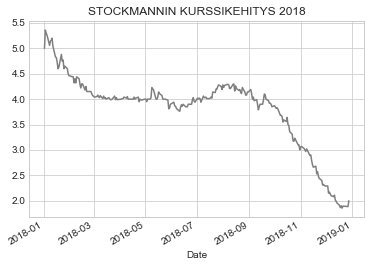

In [8]:
#Stockmannin kurssikehitys vuonna 2018, tammikuu - joulukuu.
color = "C7"
stockmann["Closing price"]["2018-01":].plot(color=color)
plt.title("STOCKMANNIN KURSSIKEHITYS 2018")

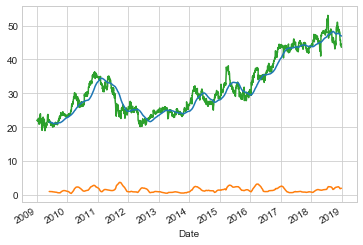

In [9]:
#Keskon kurssikehitys, liukuva keskiarvo ja keskihajontakaaviot.
color = "C2"
kesko['Closing price'].plot(color=color)
kesko['Closing price'].rolling(100).mean().plot()
kesko['Closing price'].rolling(100).std().plot()

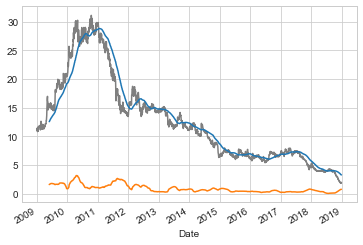

In [10]:
#Stockmannin kurssikehitys, liukuva keskiarvo ja keskihajontakaaviot.
color = "C7"
stockmann['Closing price'].plot(color=color)
stockmann['Closing price'].rolling(100).mean().plot()
stockmann['Closing price'].rolling(100).std().plot()

Text(0.5, 1.0, 'KESKON JA STOCKMANNIN KURSSIKEHITYS')

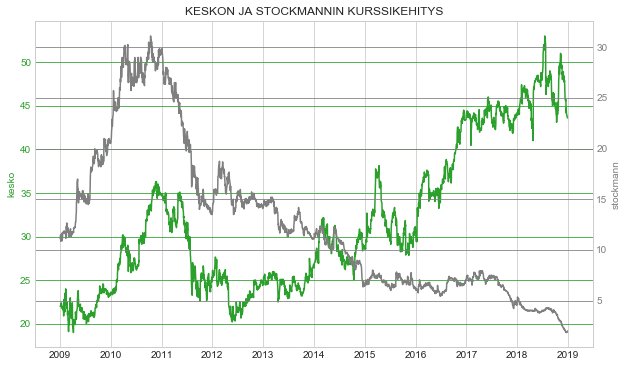

In [11]:
#Keskon ja Stockmannin kurssikehitykset 2009-2019 samassa kaaviossa.
fig1, ax1 = plt.subplots(figsize = (10, 6))

color = 'C2'
ax1.set_ylabel('kesko', color=color)
ax1.plot(kesko['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

ax2 = ax1.twinx()

color = 'C7'
ax2.set_ylabel('stockmann', color=color)
ax2.plot(stockmann['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)
plt.title("KESKON JA STOCKMANNIN KURSSIKEHITYS")

In [12]:
kesko["kesko,change"] = kesko['Closing price'].pct_change()
stockmann["stockmann,change"] = stockmann['Closing price'].pct_change()

In [13]:
#Muutosprosenttien laskeminen.
muutokset = pd.concat([kesko["kesko,change"], stockmann["stockmann,change"]], axis=1)
muutokset.head()

,"kesko,change","stockmann,change"
Date,,
2009-01-02,NaN,NaN
2009-01-05,0.005460,0.034514
2009-01-07,0.002262,-0.054791
2009-01-08,-0.006772,0.022671
2009-01-09,0.018182,0.023880


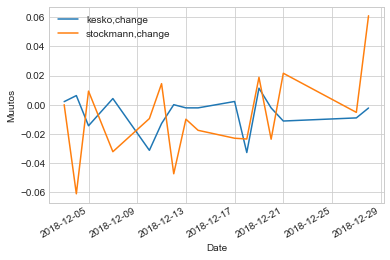

In [24]:
#Kaaviot muutosprosenteista vuoden 2018 joulukuussa.
ax5 = muutokset['2018-12':].plot()
ax5.set_ylabel('Muutos')
vals = ax5.get_yticks()